<a href="https://colab.research.google.com/github/AkhilPadma/Network_threat_analysis/blob/main/Network_Threat_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
from pathlib import Path
import pandas as pd

file_path = Path("/content/internet_firewall_data.csv")
df = pd.read_csv(file_path)
df.head(5)


Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2          1              1  
3          8              7  
4         13             18

In [3]:
df.tail(5)


Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   
65531        54867               445                0                     0   

      Action    Bytes  Bytes Sent  Bytes Received  Packets  \
65527  allow      314         192             122        6   
65528  allow  4680740       67312         4613428     4675   
65529   drop       70          70               0        1   
65530   drop       70          70               0        1   
65531   drop       70          70               0        1   

       Elapsed Time (sec)  pkts_sent  pkts_received  
65527                  15          4              2  
65528                  77        985           3690  
65529                   0          1              0  
65530                   0          1              0  
65531                   0          1              0

In [4]:
df.sample(5)

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
10321        35247                80            59441                    80   
19067        62723               445                0                     0   
61380        50969               445                0                     0   
42621        61275               445                0                     0   
1234         59343                80            59343                    80   

      Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
10321  allow   1614        1300             314       10                  15   
19067   drop     70          70               0        1                   0   
61380   drop     70          70               0        1                   0   
42621   drop     70          70               0        1                   0   
1234   allow  32527       13068           19459       56                  15   

       pkts_sent  pkts_received  
10321          5              5  
19067          1              0  
61380          1              0  
42621          1              0  
1234          21             35

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [6]:
df.shape

(65532, 12)

In [7]:
df['Action'].value_counts()

Action
allow         37640
deny          14987
drop          12851
reset-both       54
Name: count, dtype: int64

In [8]:

df[df['Action'] == 'reset-both'].sample(10)


Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
39920        29951             34021                0                     0   
39210        10967              3389            10967                  3389   
2933         11337             25773                0                     0   
39028        17800              3389            17800                  3389   
52398        40500              5618                0                     0   
1023         11317             61248                0                     0   
39030        19626              3389            19626                  3389   
38098        22130             61248                0                     0   
9190         64014              3389            64014                  3389   
39203        38126              3389            38126                  3389   

           Action  Bytes  Bytes Sent  Bytes Received  Packets  \
39920  reset-both     62          62               0        1   
39210  reset-both    293         223              70        4   
2933   reset-both    159         159               0        1   
39028  reset-both    293         223              70        4   
52398  reset-both    146         146               0        1   
1023   reset-both    143         143               0        1   
39030  reset-both    293         223              70        4   
38098  reset-both    159         159               0        1   
9190   reset-both    293         223              70        4   
39203  reset-both    293         223              70        4   

       Elapsed Time (sec)  pkts_sent  pkts_received  
39920                   0          1              0  
39210                   1          3              1  
2933                    0          1              0  
39028                   0          3              1  
52398                   0          1              0  
1023                    0          1              0  
39030                   0          3              1  
38098                   0          1              0  
9190                    0          3              1  
39203                   1          3              1

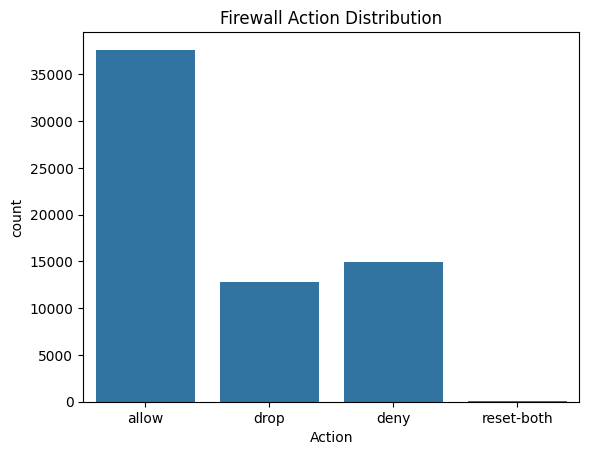

In [9]:
import seaborn as sns

sns.countplot(x='Action', data=df)
plt.title("Firewall Action Distribution")
plt.show()


**Action has 4 categories allow drop deny reset-both**

***Intrusion Detection : it basically means unauthorized access or malcoious activity with in a network or sytem that bypasses the firewalls security***

> Categorical Features : Source Port,Destination Port	,NAT Source Port	NAT Destination Port	,Action.

>Numerical Features : Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received.





# **considering:**

#**Allow -0**
# **deny/drop/reset-both -1**


In [10]:
df['is_intrusion'] = df['Action'].apply(lambda x: 1 if x in ['drop', 'deny', 'reset-both'] else 0)
df['is_intrusion'].sample(10)

12798    0
7678     1
12454    1
52624    0
32610    1
17540    0
22939    0
25644    0
61308    1
1775     1
Name: is_intrusion, dtype: int64

In [11]:
df.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received', 'is_intrusion'],
      dtype='object')

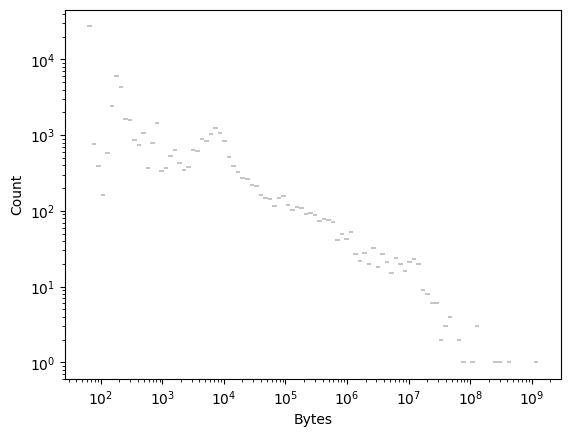

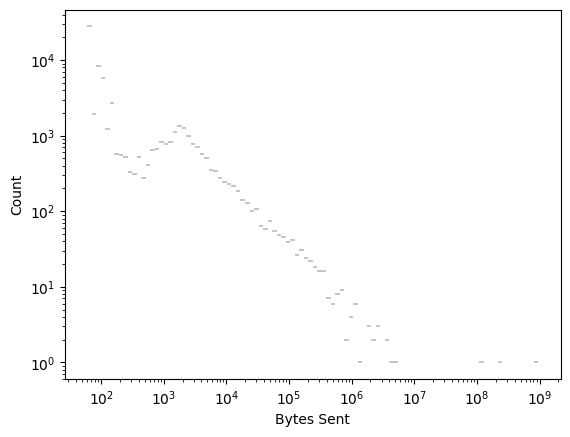

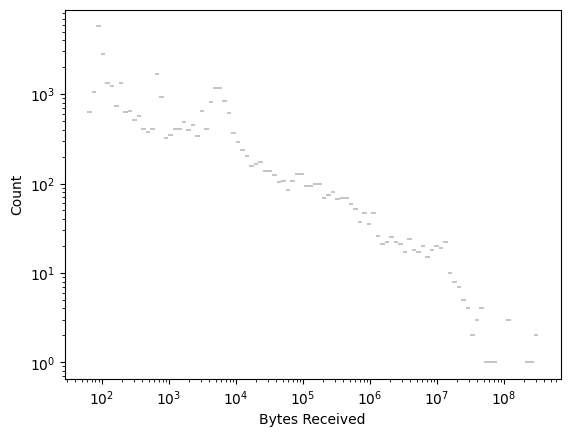

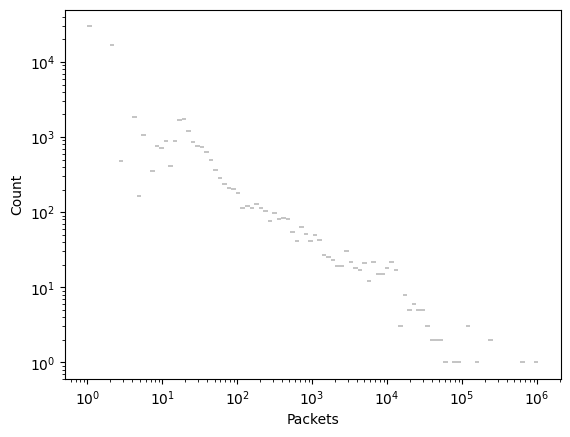

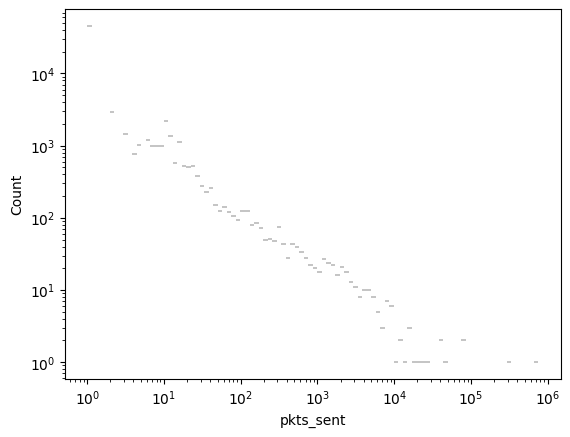

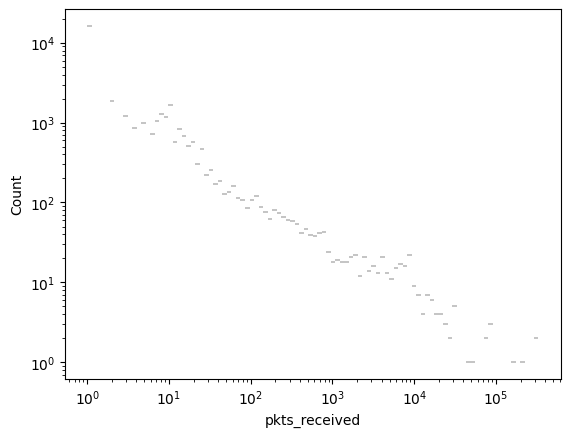

In [12]:
for cols in ['Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'pkts_sent',
       'pkts_received'] :
       sns.histplot(df[cols],bins =100,log_scale=(True,True))
       plt.show()

>here we are checking how often each value occurs

>here we can see in case bytes most of the values lie in the range of 10^2 - 10^4 and then 10^4 - 10^6 and very less values in the range of 10^6-10^8

>This is important before feeding features into ML models.



<Axes: xlabel='is_intrusion', ylabel='Destination Port'>

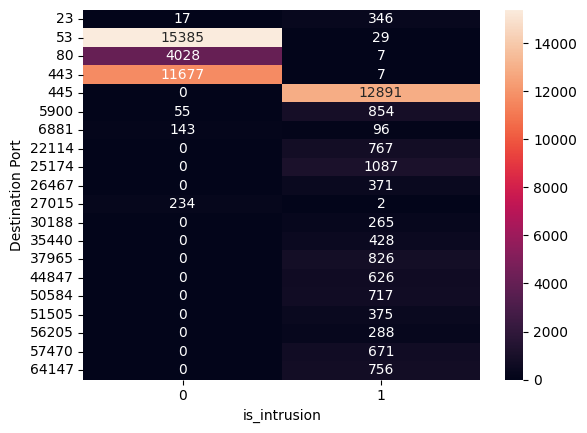

In [13]:
top_ports = df['Destination Port'].value_counts().head(20).index #visualizing top 20 destination ports based on the count
pivot = pd.pivot_table(df[df['Destination Port'].isin(top_ports)],
                       index='Destination Port', columns='is_intrusion',
                       values='Bytes', aggfunc='count')
sns.heatmap(pivot.fillna(0), annot=True, fmt='g')


In [14]:
# Define suspicious destination ports commonly associated with attacks
suspicious_ports = [3389, 22, 23, 445]

# Compute justified scores based on behavioral rules
df['justified_score'] = (
    2 * (df['Action'].str.lower().isin(['deny', 'drop','reset_both'])) +
    2 * (df['Destination Port'].isin(suspicious_ports)) +
    1 * (df['pkts_received'] == 0) +
    3 * ((df['Elapsed Time (sec)'] == 0) & (df['Bytes'] > 0)) +
    2 * ((df['Bytes Received'] == 0) & (df['Bytes Sent'] > 0)) +
    1 * (df['Packets'] <= 1)
)

# Label as intrusion if score >= 4
df['is_intrusion'] = df['justified_score'] >= 4

df.sample(10)


Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
57032        51771             19103            40132                 19103   
26963        60701               445                0                     0   
31750        64237               445                0                     0   
34982        58482               445                0                     0   
36933        56758                53            35324                    53   
29094        37911               443             2261                   443   
23375        54538                80            35235                    80   
18534        15605             50265                0                     0   
8361         62348             50584                0                     0   
21363        62234               445                0                     0   

      Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
57032  allow     70          70               0        2                   8   
26963   drop     70          70               0        1                   0   
31750   drop     70          70               0        1                   0   
34982   drop     70          70               0        1                   0   
36933  allow    173          94              79        2                  31   
29094  allow    466         392              74        4                   0   
23375  allow   4162        3455             707       14                  15   
18534   deny     62          62               0        1                   0   
8361    deny     66          66               0        1                   0   
21363   drop     70          70               0        1                   0   

       pkts_sent  pkts_received  is_intrusion  justified_score  
57032          2              0         False                3  
26963          1              0          True               11  
31750          1              0          True               11  
34982          1              0          True               11  
36933          1              1         False                0  
29094          3              1         False                3  
23375          8              6         False                0  
18534          1              0          True                9  
8361           1              0          True                9  
21363          1              0          True               11

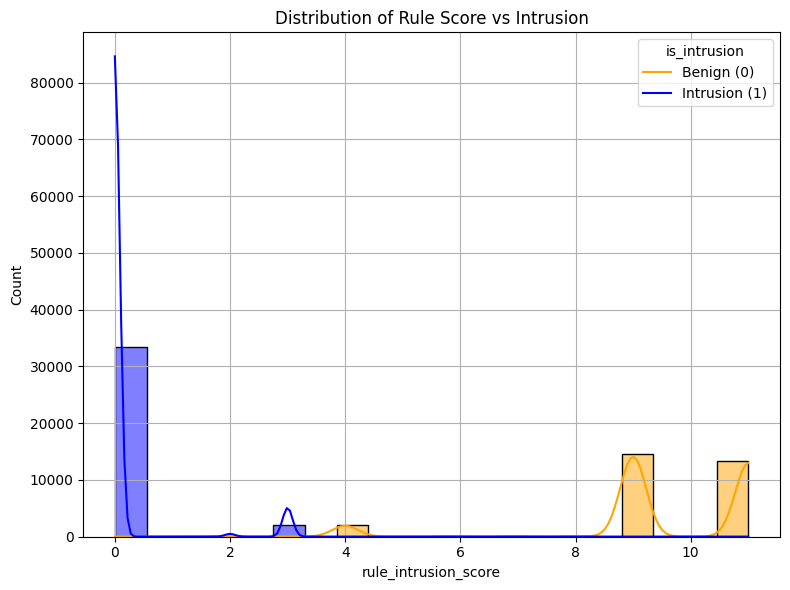

In [15]:
df['rule_intrusion_score'] = df['justified_score']
df['is_intrusion_label'] = df['is_intrusion'].astype(int)

plt.figure(figsize=(8, 6))
sns.histplot(
    data=df,
    x='rule_intrusion_score',
    hue='is_intrusion_label',
    bins=20,
    kde=True,
    palette={0: 'blue', 1: 'orange'},
    alpha=0.5
)

plt.title('Distribution of Rule Score vs Intrusion')
plt.xlabel('rule_intrusion_score')
plt.ylabel('Count')
plt.legend(title='is_intrusion', labels=['Benign (0)', 'Intrusion (1)'])
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

for threshold in range(df['justified_score'].min(), df['justified_score'].max() + 1):
    preds = df['justified_score'] >= threshold
    precision = precision_score(df['is_intrusion'], preds)
    recall = recall_score(df['is_intrusion'], preds)
    f1 = f1_score(df['is_intrusion'], preds)
    print(f"Threshold {threshold}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}")


Threshold 0: Precision=0.456, Recall=1.000, F1=0.627
Threshold 1: Precision=0.931, Recall=1.000, F1=0.965
Threshold 2: Precision=0.931, Recall=1.000, F1=0.965
Threshold 3: Precision=0.937, Recall=1.000, F1=0.967
Threshold 4: Precision=1.000, Recall=1.000, F1=1.000
Threshold 5: Precision=1.000, Recall=0.934, F1=0.966
Threshold 6: Precision=1.000, Recall=0.934, F1=0.966
Threshold 7: Precision=1.000, Recall=0.932, F1=0.965
Threshold 8: Precision=1.000, Recall=0.930, F1=0.964
Threshold 9: Precision=1.000, Recall=0.930, F1=0.964
Threshold 10: Precision=1.000, Recall=0.446, F1=0.617
Threshold 11: Precision=1.000, Recall=0.446, F1=0.617


so by above we can decide our threshold can be 4 and the also we can see from graph after 4 there is clear separation

# **Malware detection**


| Pattern                                          | Why It’s Suspicious         |
| ------------------------------------------------ | --------------------------- |
| **Allow + Very short Elapsed Time + High Bytes** | Sudden data upload/download |
| **Unusual port** + **High packets**              | Hidden communication        |
| **Same Source Port & Dest Port (loopback)**      | Port hijack, VPN tunneling  |


Allow + Very Short Time + High Bytes + High Packets

In [17]:
df['malware_rule_1'] = ((df['Action'] == 'allow') &
                      (df['Bytes'] > 10000) &
                      (df['Elapsed Time (sec)'] < 1) &
                      (df['pkts_sent'] > 10)).astype(int)


Unusual Port + High Packets Sent




In [18]:
common_ports = df['Destination Port'].value_counts().head(20).index.tolist()
df['unusual_port'] = ~df['Destination Port'].isin(common_ports)
df['malware_rule_2'] = ((df['unusual_port']) &
                        (df['pkts_sent'] > 15)).astype(int)


Same Source and Destination Port (Loopback)

In [19]:
df['malware_rule_3'] = (df['Source Port'] == df['Destination Port']).astype(int)


In [20]:
df['malware_like'] = ((df['malware_rule_1'] == 1) |
                      (df['malware_rule_2'] == 1) |
                      (df['malware_rule_3'] == 1)).astype(int)


In [21]:
df.sample(5)

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
13762        56337                53            46173                    53   
4353         19037                53            19037                    53   
20812        62562               445                0                     0   
46591        65516                53            45586                    53   
18702        54924              3478            47718                  3478   

      Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
13762  allow    268          89             179        4                  45   
4353   allow    227          89             138        2                  31   
20812   drop     66          66               0        1                   0   
46591  allow    749          94             655        2                  31   
18702  allow    312         140             172        4                  30   

       ...  pkts_received  is_intrusion  justified_score  \
13762  ...              2         False                0   
4353   ...              1         False                0   
20812  ...              0          True               11   
46591  ...              1         False                0   
18702  ...              2         False                0   

       rule_intrusion_score  is_intrusion_label  malware_rule_1  unusual_port  \
13762                     0                   0               0         False   
4353                      0                   0               0         False   
20812                    11                   1               0         False   
46591                     0                   0               0         False   
18702                     0                   0               0          True   

       malware_rule_2  malware_rule_3  malware_like  
13762               0               0             0  
4353                0               0             0  
20812               0               0             0  
46591               0               0             0  
18702               0               0             0  

[5 rows x 21 columns]

# **Traffic Spike**

Since we don't have timestamps in dataset we are assuming index order is time

In [22]:
df = df.reset_index(drop=True)
df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='10S')
df['time_block'] = df.index // 500    # One block = 500 rows
                                      # we will get time stamps ranging from 0 - 131

/tmp/ipython-input-22-514257743.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='10S')


In [23]:
block_traffic = df.groupby(['Source Port', 'time_block'])['Bytes'].sum().reset_index() #Summarize Bytes per Source Port in each time block
block_traffic

Source Port  time_block  Bytes
0                0           2   1192
1                0           5    124
2                0           6    480
3                0           7    134
4                0          11    244
...            ...         ...    ...
58627        65532          77    255
58628        65532         116   1015
58629        65533          13    277
58630        65533          16     66
58631        65534          11    414

[58632 rows x 3 columns]

In [24]:

# Get historical average and std for each Source Port
port_avg = block_traffic.groupby('Source Port')['Bytes'].mean().rename('avg_bytes')
port_std = block_traffic.groupby('Source Port')['Bytes'].std().rename('std_bytes')

# Merge into traffic block data
block_traffic = block_traffic.merge(port_avg, on='Source Port')
block_traffic = block_traffic.merge(port_std, on='Source Port')


In [25]:
block_traffic['is_spike'] = (block_traffic['Bytes'] > block_traffic['avg_bytes'] + 2 * block_traffic['std_bytes']).astype(int)

In [26]:
df['is_spike'] = 0

# Mark rows that belong to spiking Source Ports in those time blocks
for _, row in block_traffic[block_traffic['is_spike'] == 1].iterrows():
    cond = (df['Source Port'] == row['Source Port']) & (df['time_block'] == row['time_block'])
    df.loc[cond, 'is_spike'] = 1


In [27]:
df.head(5)

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  ...  \
0  allow    177          94              83        2                  30  ...   
1  allow   4768        1600            3168       19                  17  ...   
2  allow    238         118             120        2                1199  ...   
3  allow   3327        1438            1889       15                  17  ...   
4  allow  25358        6778           18580       31                  16  ...   

   rule_intrusion_score  is_intrusion_label  malware_rule_1  unusual_port  \
0                     0                   0               0         False   
1                     2                   0               0          True   
2                     0                   0               0          True   
3                     2                   0               0          True   
4                     0                   0               0         False   

   malware_rule_2  malware_rule_3  malware_like           timestamp  \
0               0               0             0 2023-01-01 00:00:00   
1               0               0             0 2023-01-01 00:00:10   
2               0               0             0 2023-01-01 00:00:20   
3               0               0             0 2023-01-01 00:00:30   
4               0               0             0 2023-01-01 00:00:40   

   time_block  is_spike  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         1  

[5 rows x 24 columns]

# **Uncommon IPs :**

In [28]:
ip_counts = df['Source Port'].value_counts()


In [29]:
rare_ips = ip_counts[ip_counts < 5].index.tolist()


In [30]:
df['rare_ip'] = df['Source Port'].isin(rare_ips).astype(int)


Network Threat Analysis

In [31]:
df['threat_flag'] = (
    df['is_intrusion'] |
    df.get('malware_like', 0) |
    df.get('is_spike', 0) |
    df.get('rare_ip', 0)
).astype(int)


In [32]:
features = [
    'Bytes', 'Bytes Sent', 'Bytes Received',
    'pkts_sent', 'pkts_received', 'Elapsed Time (sec)',]

In [33]:
# Action
action_dummies = pd.get_dummies(df['Action'], drop_first=True)  # Drops 'allow'

# Combine with numerical
X = pd.concat([df[features], action_dummies], axis=1)


In [34]:
X = df[features]
y = df['threat_flag']

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector = SelectKBest(mutual_info_classif, k=15)
X_selected = selector.fit_transform(X, y)


In [36]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X_selected, y)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

So intially I did it without sampling so i found is_threat = 0 were falling in minority cases so i applied SMOTE(oversampling method)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    results[name] = {
        "model": model,
        "y_pred": y_pred
    }



Model: Random Forest
[[9155  797]
 [1451 8501]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      9952
           1       0.91      0.85      0.88      9952

    accuracy                           0.89     19904
   macro avg       0.89      0.89      0.89     19904
weighted avg       0.89      0.89      0.89     19904


Model: Logistic Regression
[[1263 8689]
 [1108 8844]]
              precision    recall  f1-score   support

           0       0.53      0.13      0.20      9952
           1       0.50      0.89      0.64      9952

    accuracy                           0.51     19904
   macro avg       0.52      0.51      0.42     19904
weighted avg       0.52      0.51      0.42     19904


Model: SVM
[[9024  928]
 [3156 6796]]
              precision    recall  f1-score   support

           0       0.74      0.91      0.82      9952
           1       0.88      0.68      0.77      9952

    accuracy                           

Among the classifiers applied random forest gave us the best result after the using oversampling method and used mutual_info_classif to keep top features

In [39]:
if "Random Forest" in results:
    rf_model = results["Random Forest"]["model"]
    rf_y_pred = results["Random Forest"]["y_pred"]
    print("\nRandom Forest Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, rf_y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, rf_y_pred):.3f}")
    print(f"F1 Score: {f1_score(y_test, rf_y_pred):.3f}")


Random Forest Evaluation:
Accuracy: 0.887
Precision: 0.914
Recall: 0.854
F1 Score: 0.883
